In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import tree

In [2]:
data_loan = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')

In [3]:
data_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data_loan.drop(['ID','ZIP Code'], axis=1, inplace =True)

In [5]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [6]:
x = data_loan.drop(['Personal Loan'], axis=1)
y = data_loan['Personal Loan']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=0)

Here the DV: Personal Loan and rest are IDV

**Selecting features with highest values**

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rf_model = RandomForestClassifier(n_estimators =1000, max_features=2, oob_score= True)

In [10]:
rf_model.fit(X= x_train, y= y_train)

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [11]:
print("The accuracy score for the dataset: ", rf_model.oob_score_)

The accuracy score for the dataset:  0.9868571428571429


In [12]:
important = []
for feature, imp in zip(x_train.columns.tolist(), rf_model.feature_importances_):
    important.append(imp)
    print(feature, ':           ', imp)

Age :            0.04514999787208601
Experience :            0.04646215587403486
Income :            0.3524587962046225
Family :            0.08804413950632808
CCAvg :            0.1854966932350743
Education :            0.15461582359291567
Mortgage :            0.045421041435069295
Securities Account :            0.006082298630363311
CD Account :            0.05685441684740013
Online :            0.009119219746933603
CreditCard :            0.010295417055172295


In [13]:
sorted(important, reverse=True)[0:5]

[0.3524587962046225,
 0.1854966932350743,
 0.15461582359291567,
 0.08804413950632808,
 0.05685441684740013]

We can take four values from the model: Income, CCAvg, Education

**Visualizing the Decision Tree with the selected features**

In [14]:
tree_model = tree.DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10)

In [15]:
final_features = x_train[['Income', 'CCAvg','Education']]

In [16]:
tree_model.fit(X= final_features, y=y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10)

In [17]:
with open('Dtree_loan.dot','w') as f:
    f = tree.export_graphviz(tree_model, feature_names= ['Income', 'CCAvg','Education'], out_file=f)

In [18]:
print("The Accuracy Score for the model is: ", tree_model.score(X=final_features, y=y_train))

The Accuracy Score for the model is:  0.9717142857142858


**Grpahviz Illustration displaying the Rules**

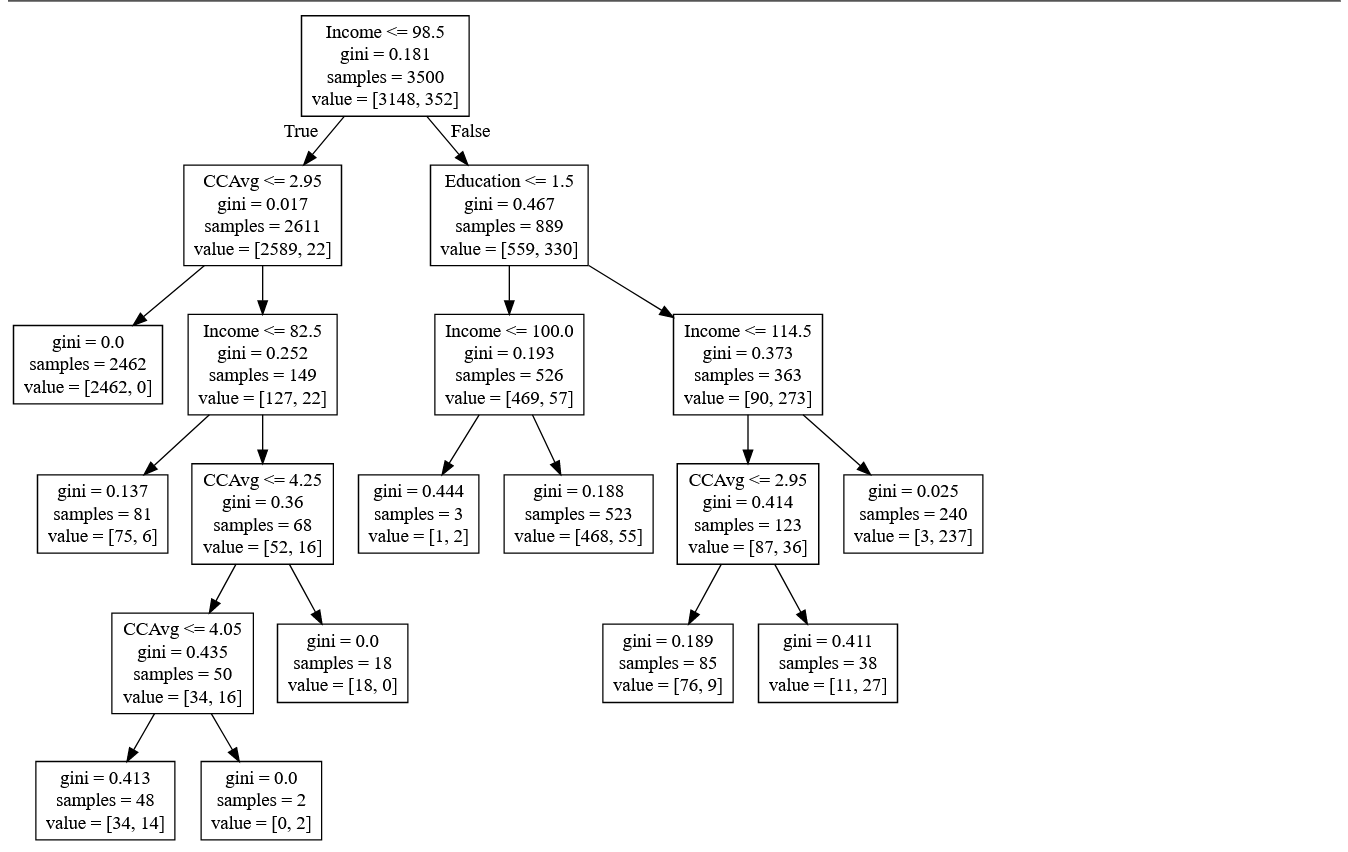